Exercises

Do your work for this exercise in a jupyter notebook named feature_engineering within the regression-exercises repo. Add, commit, and push your work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get the feature selection stuff we want:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# grab our data source
from pydataset import data

In [4]:
# acquire our data from pydataset
tips = data('tips')

        
        Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 23.4+ KB


In [7]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3


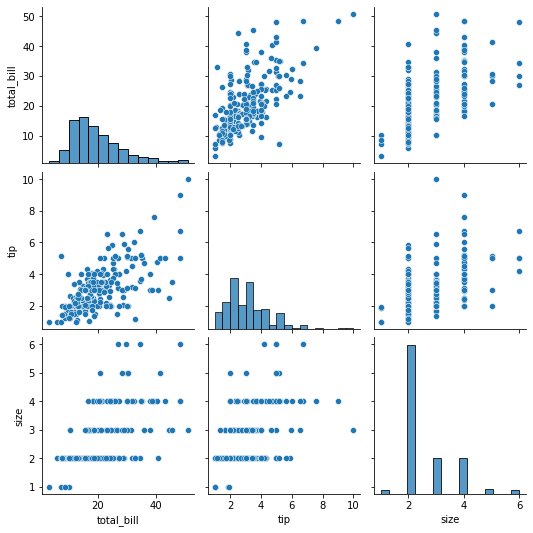

In [5]:
sns.pairplot(data=tips)

In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 23.4+ KB


In [9]:
cat_cols = ['sex', 'smoker', 'day', 'time']
num_cols = ['total_bill', 'size']

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


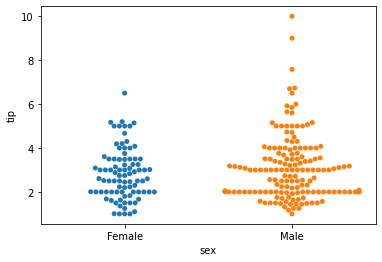

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


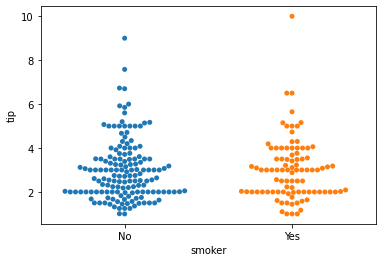

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


/opt/homebrew/anaconda3/envs/homebase/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/envs/homebase/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


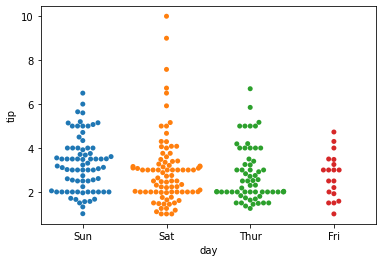

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64


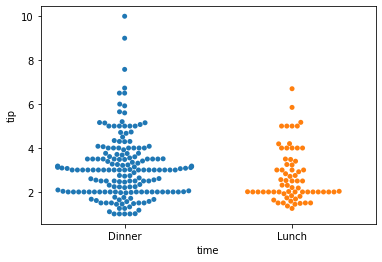

In [13]:
for col in cat_cols:
    print(tips.groupby(col).tip.mean())
    sns.swarmplot(data=tips, x=col, y='tip')
    plt.show()

In [14]:
from scipy import stats

In [15]:
# h0: there is not a significant difference in the means of people that tip on the weekends versus people that tip on weekdays
# ha: there *is* a difference in the means of weekend tippers versus nonweekend tippers

# alpha = 0.05

In [16]:
stats.ttest_ind(
    tips[(tips.day == 'Sun') | (tips.day == 'Sat')].tip,
    tips[(tips.day == 'Thur') | (tips.day == 'Fri')].tip
)

Ttest_indResult(statistic=1.8834950801996837, pvalue=0.06083244523772748)

In [17]:
# conclusion: we cannot reject the null hypothesis and suggest that weekend tippers generally tip differently than weekday tippers

    Load the tips dataset.
        Create a column named price_per_person. This should be the total bill divided by the party size.

In [18]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [19]:
tips['price_per_person'] = tips['total_bill'] / tips['size']

In [20]:
tips

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,9.676667
241,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000
242,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000
243,17.82,1.75,Male,No,Sat,Dinner,2,8.910000


In [21]:
# add that to my num_cols:
num_cols.append('price_per_person')

In [22]:
# let's proceed forward into our feature selection process

        
        Use select k best to select the top 2 features for predicting tip amount. What are they?

In [ ]:
# let's make our functions first and then elect to use them:

    Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [24]:
def select_kbest(X, y, k=2):
    '''
    will take in two pandas objects:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of ideal features we elect to select
    
    return: a list of the selected features from the SelectKBest process
    '''
    kbest = SelectKBest(f_regression, k=k)
    kbest.fit(X, y)
    mask = kbest.get_support()
    return X.columns[mask]
    

    Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [25]:
def rfe(X, y, k=2):
    '''
    will take in two pandas objects:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of ideal features we elect to select
    
    return: a list of the selected features from the recursive feature elimination process
    '''
    rf = RFE(LinearRegression(), n_features_to_select=k)
    rf.fit(X, y)
    mask = rf.get_support()
    return X.columns[mask]

        
        Use recursive feature elimination to select the top 2 features for tip amount. What are they?

In [26]:
X_train = tips[num_cols]
y_train = tips.tip
rfe(X_train, y_train)

Index(['total_bill', 'price_per_person'], dtype='object')

In [27]:
select_kbest(X_train, y_train)

Index(['total_bill', 'size'], dtype='object')

        
        Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

    Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [28]:
swiss = data('swiss')

In [29]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [30]:
# considerations that we would take if this was a real pipeline:
# we would indeed be scaling any continuous features
# we would also be encoding any categorical features
# we would also be doing a train_test_split
# this is a lesson review on feature selection so I'm just cutting corners

In [31]:
X = swiss.drop(columns='Infant.Mortality')
y = swiss['Infant.Mortality']

In [32]:
rfe(X, y, k=3)

Index(['Fertility', 'Examination', 'Education'], dtype='object')

In [33]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [34]:
select_kbest(X, y, k=3)

Index(['Fertility', 'Examination', 'Catholic'], dtype='object')

Conclusions:
Fertility is drawing the most significance according to each of these feature selection methods, but I have questions about the data integrity and metric establishment of the Fertility metric and how it relates to proportion of the population.  I will attempt to investigate this further before putting a model into production.

Examination seems to be a winning driver, as it was the only other that both methods selected, and i will corroborate this with a statistical correlation test as well as exploratory data visualizations.

I'll refer back to my EDA to see if Catholic and/or Education are exceptionally valuable to the output of my model: If one of them happens to be more valuable, I may elect to keep one or both for modelinbg in production.  I will also corroborate this information with the modeling process (trying different feature spaces as I train my models)